# Speech Processing Lab 4

Rishabh Tripathi (180030036)

## **Aim**

1. To understand the time and frequency domain characteristics of **voiced and unvoiced speech.**
2. To perform the voiced/unvoiced/silence classification of speech.


## **Theory**

### **Voiced Speech**
If the input excitation is nearly periodic impulse sequence, then the corresponding speech looks visually nearly periodic and is termed as **voiced speech.** During the production of voiced speech, the air exhaling out of lungs through the trachea is interrupted periodically by the vibrating vocal folds. Due to this, the glottal wave is generated that excites the speech production system resulting in the voiced speech.

Thus it is expected that voiced speech will have a periodic nature and we can observe its fundamental frequency as well as the overtones.

### **Unvoiced Speech**
If the excitation is random noise-like, then the resulting speech will also be random noise-like without any periodic nature and is termed as **unvoiced Speech.** During the production of unvoiced speech, the air exhaling out of lungs through the trachea is not interrupted by the vibrating vocal folds. However, starting from glottis, somewhere along the length of vocal tract, total or partial closure occurs which results in obstructing air flow completely or narrowly. This modification of airflow results in stop or frication excitation and excites the vocal tract system to produce unvoiced speech.

### **Silence Region**
The speech production process involves generating voiced and unvoiced speech in succession, separated by what is called **silence region.** During silence region, there is no excitation supplied to the vocal tract and hence no speech output.

### **Autocorrelation**
The autocorrelation function allows to compute the correlation of a signal with
itself as a function of time.

$r_k=\sum_{i=0}^{N-k-1} {s_i}{s_{i+k}}$

$k \implies$ shift (number of samples)

### **Short Term Zero-Crossing Rate**
It is the number of times zero axis is crossed per frame.

### **Short Term Energy**
It is the sum of squares of samples in one frame.

$E=\sum_{i=0}^{N-1} {s_i}^2$

In [ ]:
# importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq,fftshift
from scipy import signal
from scipy.io import wavfile
import librosa
import librosa.display

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Problem A**

Record the phrase **“Speech signal”** and plot the time waveform. Use 16kHz and 16 bits/sample as the sampling frequency and bit resolution respectively.

### **Procedure**
1. The phrase **"Speech signal"** is recorded using WaveSurfer at the given specifications.
2. The .wav file saved is uploaded to Google Drive.
3. We use Librosa library to load the audio file.
4. Plot the waveform using Matplotlib.

In [ ]:
%cd drive/MyDrive/Speech\ Processing\ Lab/Lab\ 4

/content/drive/MyDrive/Speech Processing Lab/Lab 4


In [ ]:
!ls

'speech signal.wav'


In [ ]:
# Loading the audio file
audio, fs = librosa.load("speech signal.wav", sr = 16000)
t = np.arange(0, audio.shape[0]/fs, 1/fs)

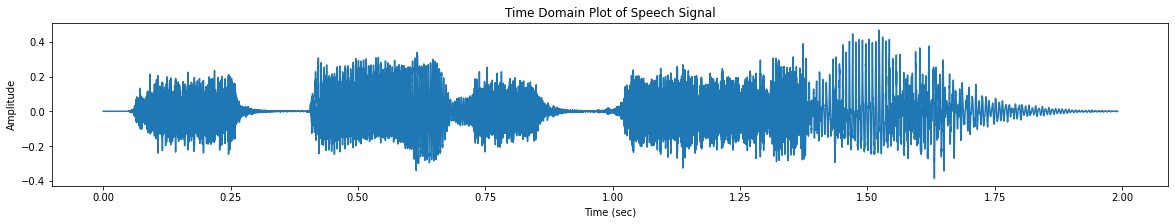

In [ ]:
# plotting the waveform of complete speech signal
plt.figure(figsize=(20,3))
plt.plot(t, audio)
plt.title("Time Domain Plot of Speech Signal")
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.show()

## **Problem B**
Examine  "s", "ch",  any one vowel, any one nasal from A as follows. Take one segment of 25 ms duration at the centre of the sound. Compute and plot the Autocorrelation function, and comment on the periodicity of the sounds. Compare the autocorrelation plots for various sounds and comment on how autocorrelation can be used for classifying the sounds as voiced and unvoiced.

### **Procedure**
1. Using WaveSurfer find the time stamps (centre of the sound) for different sounds. Here we take the following sounds:
    * ss
    * ch
    * ee (vowel)
    * n (nasal)
2. We extract the 4 sounds by taking 25 ms segments around their centre.
3. We compute and plot the autocorrelation function for each sound using the function autocorr() we define below.
4. We also plot the waveform of each sound segment along with the autocorrelation for better observation.

In [ ]:
def wave_plot(sound, sound_name):
    plt.figure(figsize=(15,5))
    plt.plot(sound)
    plt.title("Time Domain Plot of sound "+ "/" + sound_name + "/")
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
    plt.show()

In [ ]:
def autocorr(sound, sound_name):
    len = sound.shape[0]
    shift = np.arange(0, len, 1)
    autocorr = np.zeros((shift.shape[0],))

    for curr_shift in shift:
        autocorr[curr_shift] = np.dot(sound[0:len-curr_shift].T,sound[curr_shift:])

    plt.figure(figsize=(15,5))
    plt.plot(shift, autocorr)
    plt.title("Autocorrelation of sound "+ "/" + sound_name + "/")
    plt.xlabel('Shift')
    plt.ylabel('Autocorrelation')
    plt.show()

    #return autocorr

In [ ]:
# Using WaveSurfer we obtain the centre time stamp for each sound:
# ss => 0.181 s
# ch => 0.800 s
# ee => 0.480 s
# n => 1.500 s

# Extracting 25 ms segments around these centre time stamps
ss = audio[int((0.181-0.0125)*fs):int((0.181+0.0125)*fs)]
ch = audio[int((0.8-0.0125)*fs):int((0.8+0.0125)*fs)]
ee = audio[int((0.48-0.0125)*fs):int((0.48+0.0125)*fs)]
n = audio[int((1.5-0.0125)*fs):int((1.5+0.0125)*fs)]

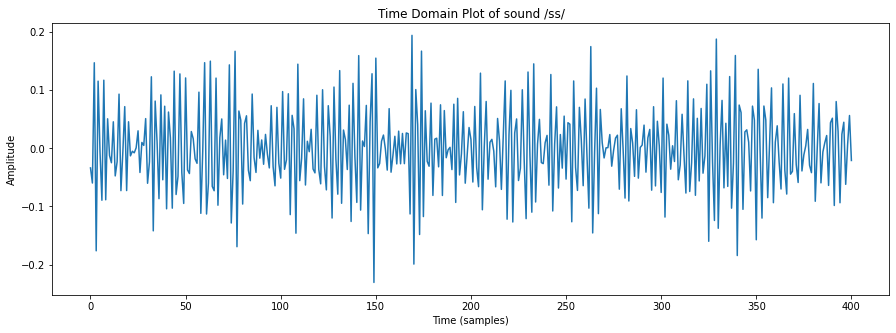

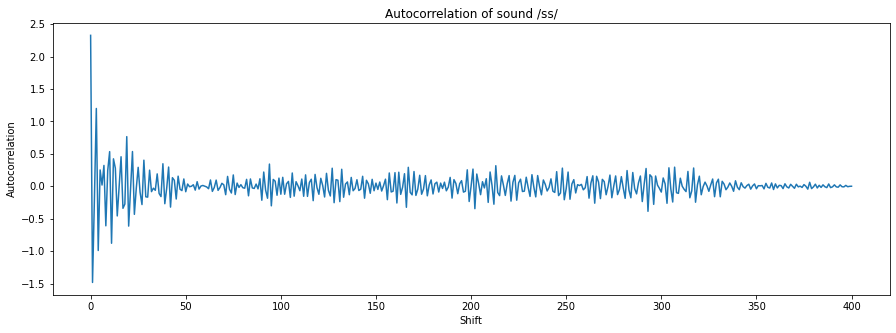

In [ ]:
# Waveform and autocorrelation of sounds
wave_plot(ss, "ss")
autocorr(ss, "ss")

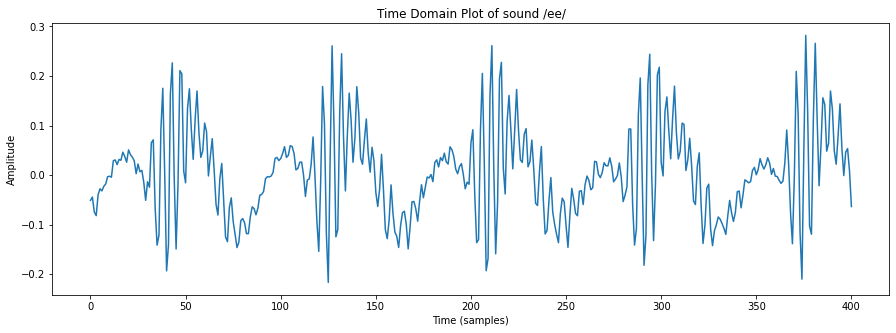

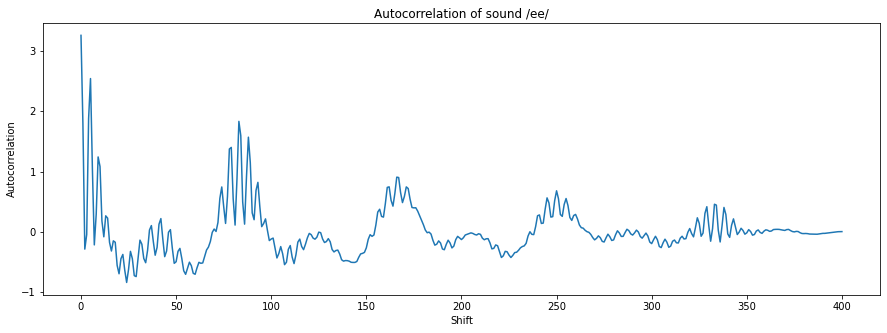

In [ ]:
# Waveform and autocorrelation of sounds
wave_plot(ee, "ee")
autocorr(ee, "ee")

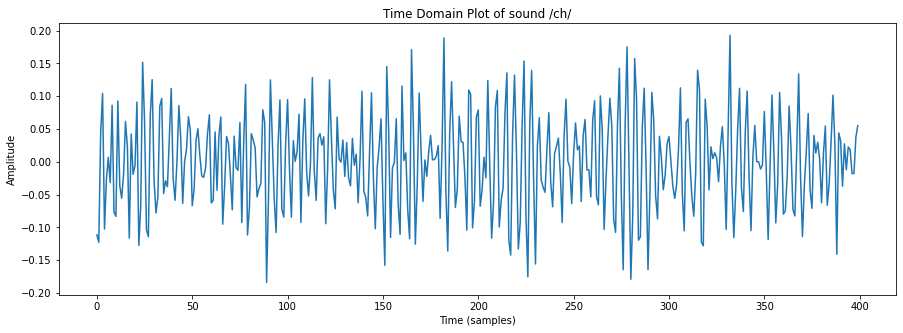

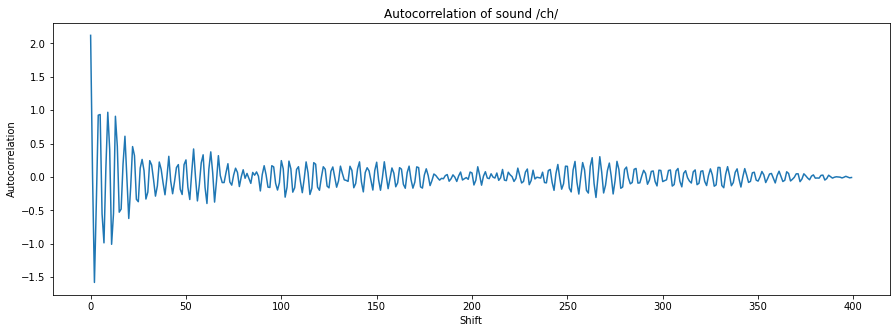

In [ ]:
# Waveform and autocorrelation of sounds
wave_plot(ch, "ch")
autocorr(ch, "ch")

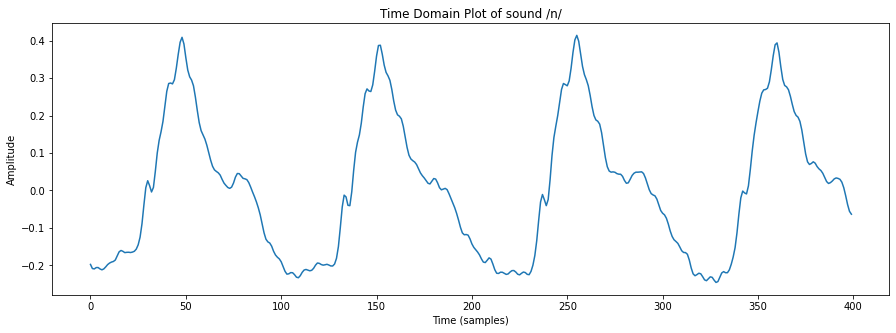

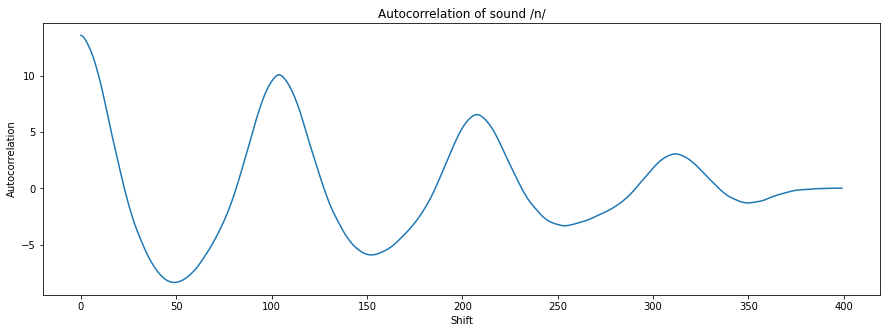

In [ ]:
# Waveform and autocorrelation of sounds
wave_plot(n, "n")
autocorr(n, "n")

### **Observations**
1. We observe that the autocorrelation of a signal attains a peak when the shift is an integer multiple of the fundamental period (for the periodic signals).
2. In case of periodic signals (voiced speech) like "ee" and "n" sounds, we see that autocorrelation has a signicant peak $r_p, (p>0)$ such that

    $r_p>0.3 r_0$

    As taught in the class, then we can say that $pT_s$ is a period of the signal. ($T_s$ is the sampling period)
3. In case of non-periodic signals (unvoiced speech) like "ss" and "ch" sounds, we do not observe such peaks for an $p>0$.

### **Inference**
We can use autocorrelation to classify between voiced and unvoiced speech by looking between $r0$ and $r_{max}$ for an $r_p, (p>0)$ such that

$r_p>0.3 r_0$

If we can find such a $p$ then we have a voiced speech sound with period $pT_s$ as told above, otherwise we have an unvoiced speech signal.

## **Problem C**
Consider the 4 speech sounds mentioned in B and one silence segment.  For each of these 5 audio segments, compute and plot **Short Term Zero-Crossing rate** and the **Short Term Energy** as a function of frame index for all the frames in the sound. Use 25 msec and 10msec as frame_size and frame_shift respectively. Comment on how you would use these time-domain features for classifying the sounds as voiced or unvoiced or silence.

### **Procedure**
1. We use WaveSurfer to get time stamps for entire durations of the 5 sounds (including silence).
2. We extract these segments in respective variables.
3. Using the functions defined below, we compute and plot the Short Term Zero-Crossing Rate and the Short Term Energy as a function of frame index for all frames in the sounds.

In [ ]:
# Time stamps for entire durations of sounds:

# ss => 0.105s - 0.234s
# ch => 0.740s - 0.837s
# ee => 0.427s - 0.587s
# n => 1.459s - 1.529s
# silence => 0.326s - 0.401s

ss = audio[int(0.105*fs):int(0.234*fs)]
ch = audio[int(0.740*fs):int(0.837*fs)]
ee = audio[int(0.427*fs):int(0.587*fs)]
n = audio[int(1.459*fs):int(1.529*fs)]
silence = audio[int(0.326*fs):int(0.401*fs)]

In [ ]:
# Defining frame size and shift in seconds
frame_size = 0.025
frame_shift = 0.010

In [ ]:
# Function to compute Short Term Zero-Crossing Rate
def ST_ZCR(sound, sound_name):
    len = sound.shape[0]
    zcr_array = np.zeros((int(np.floor((len-frame_size*fs)/(frame_shift*fs)))+1,))

    for i in range(zcr_array.shape[0]):

        frame = sound[int(i*(frame_shift*fs)): int(i*(frame_shift*fs)+(frame_size*fs))]
        zero_crosses = np.nonzero(np.diff(frame > 0))[0]
        zcr_array[i] = (zero_crosses.size)/(frame_size*fs)

    plt.figure(figsize=(10,5))
    plt.plot(zcr_array)
    plt.title("Short Term Zero-Crossing Rate of sound "+ "/" + sound_name + "/")
    plt.xlabel('Frame index')
    plt.ylabel('ZCR')
    plt.show()

In [ ]:
# Function to compute Short Term Energy
def ST_energy(sound, sound_name):
    len = sound.shape[0]
    ste_array = np.zeros((int(np.floor((len-frame_size*fs)/(frame_shift*fs)))+1,))

    for i in range(ste_array.shape[0]):

        frame = sound[int(i*(frame_shift*fs)): int(i*(frame_shift*fs)+(frame_size*fs))]
        ste_array[i] = np.sum(frame**2)

    plt.figure(figsize=(10,5))
    plt.plot(ste_array)
    plt.title("Short Term Energy of sound "+ "/" + sound_name + "/")
    plt.xlabel('Frame index')
    plt.ylabel('Energy')
    plt.show()

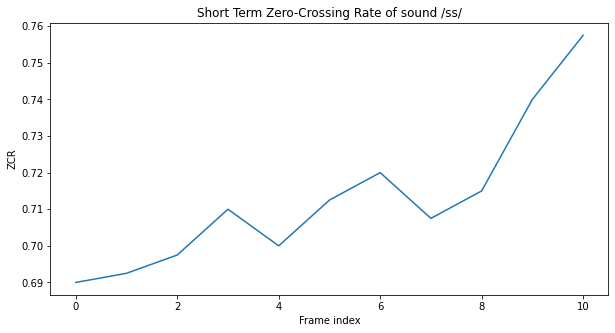

In [ ]:
ST_ZCR(ss, "ss")

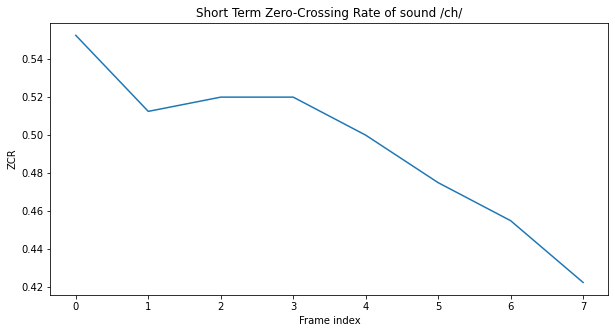

In [ ]:
ST_ZCR(ch, "ch")

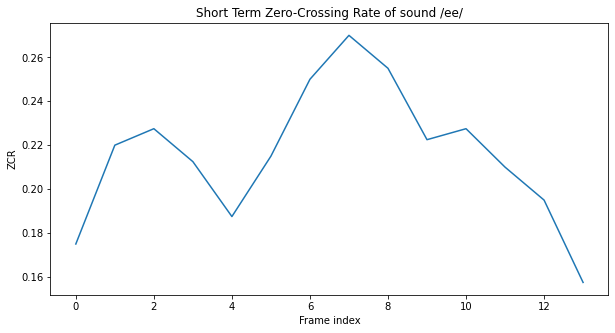

In [ ]:
ST_ZCR(ee, "ee")

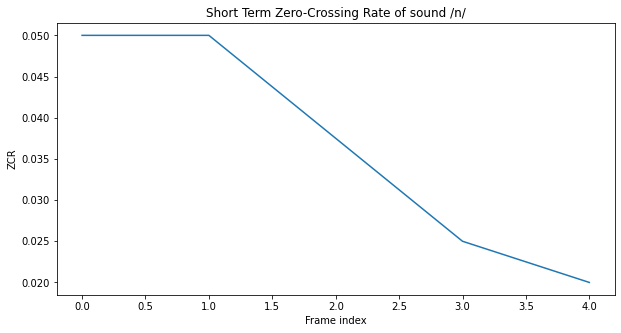

In [ ]:
ST_ZCR(n, "n")

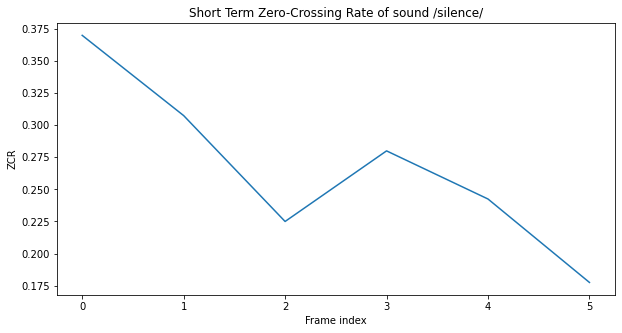

In [ ]:
ST_ZCR(silence, "silence")

### **Observation**
1. We observe that the short term ZCR is significantly high for unvoiced speech sounds like "ss" and "ch" sounds.
2. In case of voiced speech it is has a low value as observed for "ee" and "n" sounds.
3. For silence (background noise), the short term ZCR is somewhere in between voiced and unvoiced speech sounds.

### **Inference**
We can use the short term ZCR to classify between voiced and unvoiced speech signals by first obtaining the average ZCR for the silence regions (background noise), say, $Z_b$. 

Then we can define two threshold values, one for voiced and another for unvoiced speech signal. So a given speech sound will be voiced if

$Z < Z_b - \alpha$

and the sound will be unvoiced if

$Z > Z_b + \beta$

$\alpha , \beta$ are chosen experimentally. 

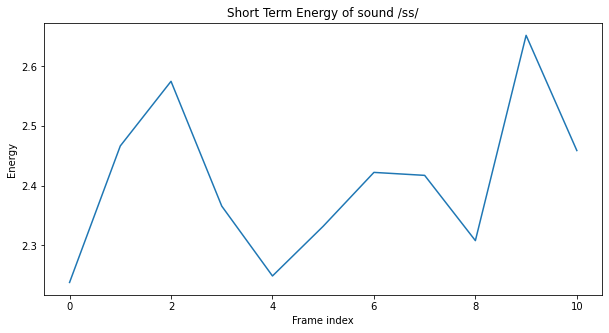

In [ ]:
ST_energy(ss, "ss")

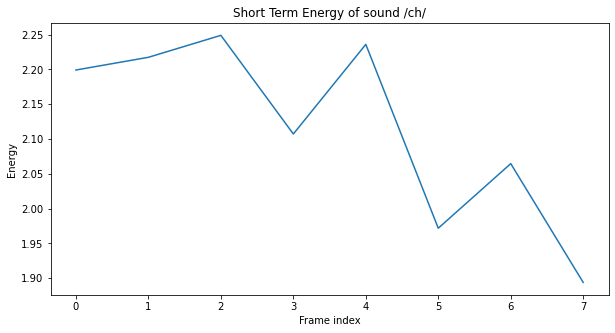

In [ ]:
ST_energy(ch, "ch")

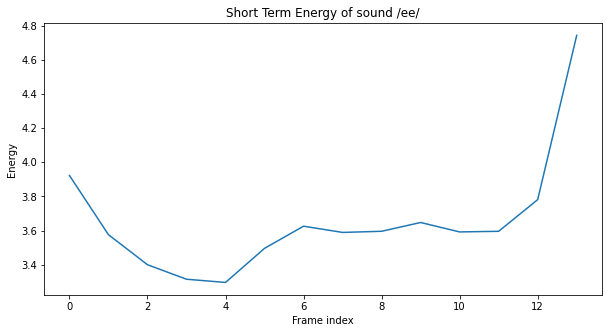

In [ ]:
ST_energy(ee, "ee")

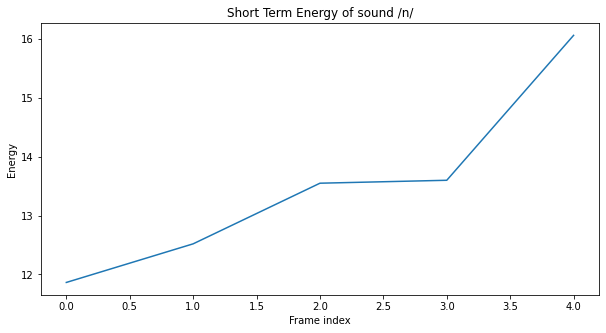

In [ ]:
ST_energy(n, "n")

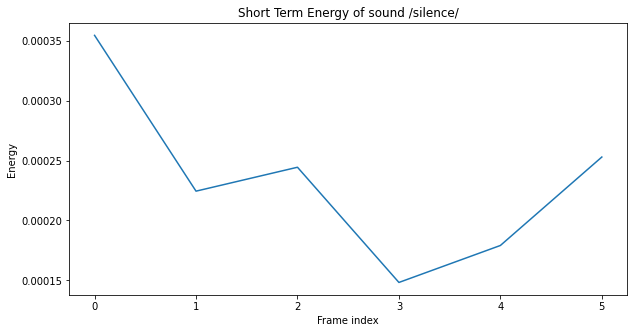

In [ ]:
ST_energy(silence, "silence")

### **Observations**
1. We observe that the energy present in the voiced speech signals like "ee" and "n" sounds is much higher than that present in the unvoiced sounds like "ss" and "ch".
2. The energy in the silence regions is extremely low. 

### **Inference**
We can use short term energy value to differentiate between voiced and unvoiced speech signal by defining a threshold, above which we will have voiced signals and below which we will have the unvoiced signal. Also we can easily distinguish between silence and voiced/unvoiced speech signal using short term energy.

## **Problem D**
Plot the magnitude spectrum (with magnitude in log scale)  of the 4 speech sounds. Comment/explain how the visual inspection of the spectrum can be used to classify the sound as voiced or unvoiced.

### **Procedure**
1. We define a function below to compute the Discrete Fourier Transform of the given signal and we plot the magnitude spectrum.


In [ ]:
def plot_spectrum(sound, sound_name):
    
    # Getting the Discrete Fourier Transform of the sound
    total_len = sound.shape[0]
    audio_fft = fft(sound)/total_len

    f_array = fftfreq(total_len, 1/fs)
    
    plt.figure(figsize=(10,5))
    plt.plot(f_array[0:total_len//2], 2*np.abs(audio_fft[0:total_len//2]))
    plt.title("Magnitude Spectrum of "+ "/" + sound_name + "/")
    plt.yscale('log')
    plt.xlim((0, 15000))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.show()

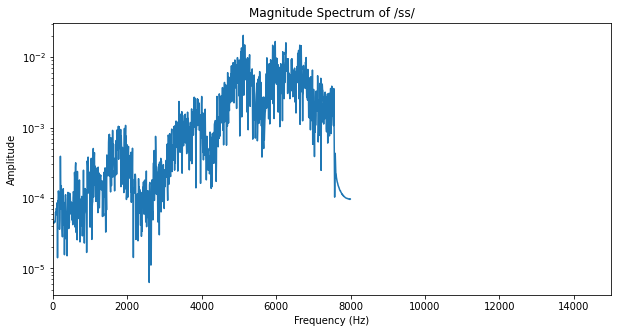

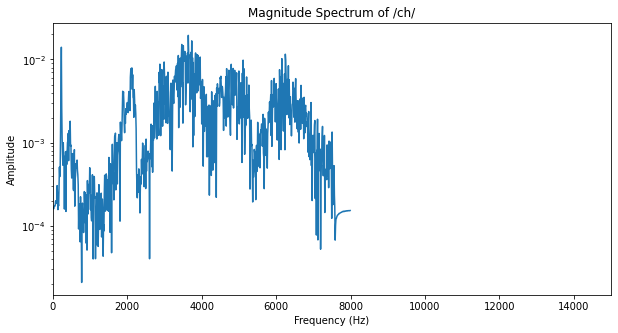

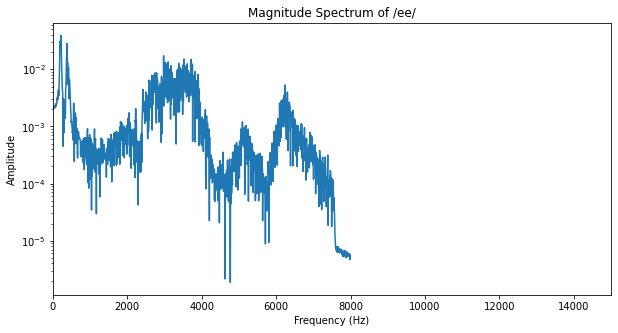

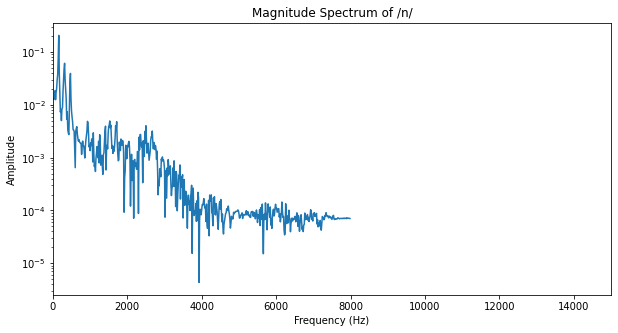

In [ ]:
plot_spectrum(ss, 'ss')
plot_spectrum(ch, 'ch')
plot_spectrum(ee, 'ee')
plot_spectrum(n, 'n')

### **Observations**
1. We observe that the unvoiced speech signal like "ss" and "ch" have higher energy in the high frequency region. 
2. We also observe that the voiced speech signals like "ee" and "n" have more energy in the low frequency regions, with some significant peaks showing the fundamental frequency and the overtones.

### **Inference**
We can classify unvoiced and voiced speech signals by visual inspection of the magnitude spectrum. We need observe in which frequency region we obtain the highest peaks. If the peaks are observed mostly in the high frequency region, it is an unvoiced sound. If the peaks are oberserved in the low frequency region, it is a voiced sound. Also, the voiced speech signals will have sharp and distanced peaks showing the fundamental frequency and overtones, whereas the unvoiced speech signals will have more distorted peaks.